Importing the necessary packages

In [1]:
import pandas as pd

df = pd.read_csv(r'C:\Users\Blen\OneDrive\Desktop\10Academy\Week0\data\sierraleone-bumbuna.csv')

Calculating mean, mode and SD

In [2]:
summary_stats = df.describe()
print(summary_stats)

                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      201.957515     116.376337     113.720571     206.643095   
std       298.495150     218.652659     158.946032     300.896893   
min       -19.500000      -7.800000     -17.900000       0.000000   
25%        -2.800000      -0.300000      -3.800000       0.000000   
50%         0.300000      -0.100000      -0.100000       3.600000   
75%       362.400000     107.000000     224.700000     359.500000   
max      1499.000000     946.000000     892.000000    1507.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      198.114691      26.319394      79.448857       1.146113   
std       288.889073       4.398605      20.520775       1.239248   
min         0.000000      12.300000       9.900000       0.000000   
25%         0.000000      23.1000

Cheking for missing values and outliers

In [3]:
missing_values = df.isnull().sum()
outliers = df[(df['GHI'] < 0) | (df['DNI'] < 0) | (df['DHI'] < 0)]
print(missing_values)
print(outliers)

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64
               Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb     RH   WS  WSgust  \
0       2021-10-30 00:01 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.1  0.0     0.0   
1       2021-10-30 00:02 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.2  0.0     0.0   
2       2021-10-30 00:03 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.2  0.0     0.0   
3       2021-10-30 00:04 -0.7  0.0 -0.8   0.0   0.0  21.9   99.3  0.0     0.0   
4       2021-10-30 00:05 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.3  0.0     0.0   
...                  ...  ...  ...  ...   ...

Handling missing values and anomalies
(Replace those entries that have negative values for GHI, DNI, and DHI with zero)

In [4]:
df.drop('Comments', axis=1, inplace=True)
df['GHI'] = df['GHI'].clip(lower=0)
df['DNI'] = df['DNI'].clip(lower=0)
df['DHI'] = df['DHI'].clip(lower=0)

Check for outliers in sensor readings (ModA, ModB) and wind speed data (WS, WSgust) using z-score.
And removing the rows with outliers on them

In [5]:
import numpy as np
from scipy import stats

In [6]:
z_scores = np.abs(stats.zscore(df[['ModA', 'ModB', 'WS', 'WSgust']]))


outliers = (z_scores > 3).any(axis=1)

df = df[~outliers]

In [7]:
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
0,2021-10-30 00:01,0.0,0.0,0.0,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
1,2021-10-30 00:02,0.0,0.0,0.0,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
2,2021-10-30 00:03,0.0,0.0,0.0,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
3,2021-10-30 00:04,0.0,0.0,0.0,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6
4,2021-10-30 00:05,0.0,0.0,0.0,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6


Checking the data after cleaning

In [8]:
missing_values = df.isnull().sum()
outliers = df[(df['GHI'] < 0) | (df['DNI'] < 0) | (df['DHI'] < 0)]
print(missing_values)
print(outliers)

Timestamp        0
GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH               0
WS               0
WSgust           0
WSstdev          0
WD               0
WDstdev          0
BP               0
Cleaning         0
Precipitation    0
TModA            0
TModB            0
dtype: int64
Empty DataFrame
Columns: [Timestamp, GHI, DNI, DHI, ModA, ModB, Tamb, RH, WS, WSgust, WSstdev, WD, WDstdev, BP, Cleaning, Precipitation, TModA, TModB]
Index: []


Calculating the total number of rows after cleaning the data

In [9]:
total_rows = df.shape[0]
print("Total number of rows:", total_rows)

Total number of rows: 518970


Heatmap for correlation matrix

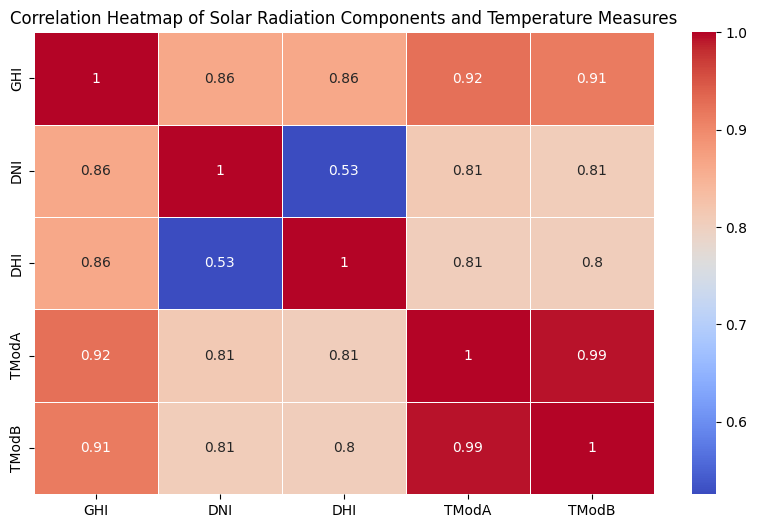

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt


corr_matrix = df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Solar Radiation Components and Temperature Measures")
plt.show()

Pair plot for visualizing relationships

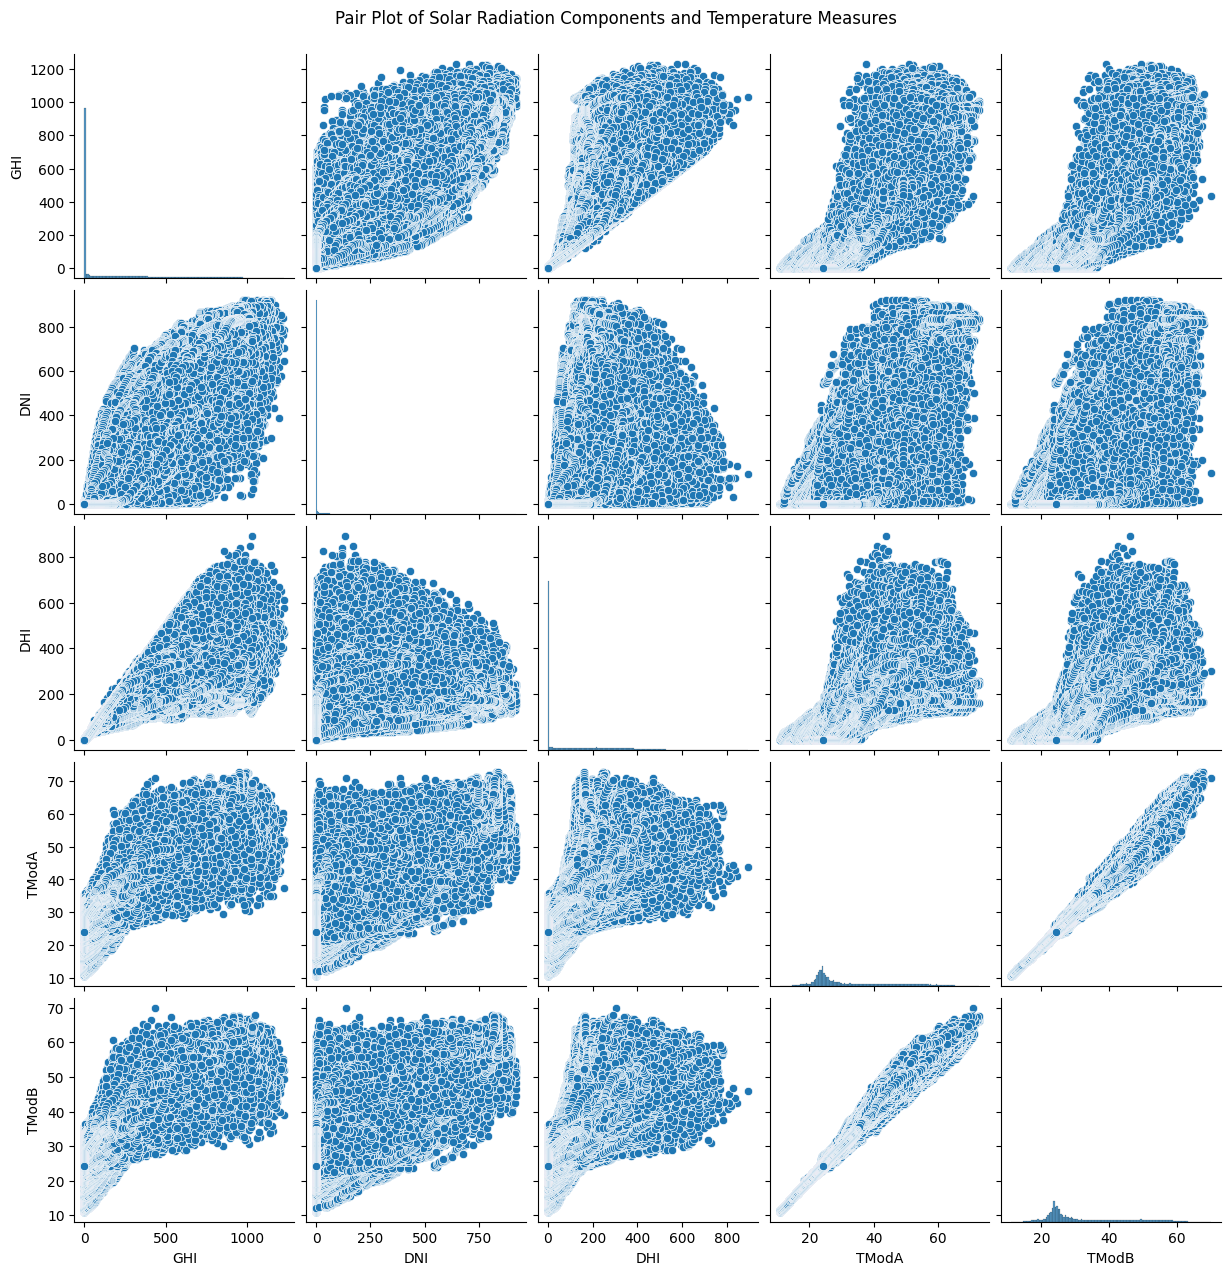

In [11]:
sns.pairplot(df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']])
plt.suptitle("Pair Plot of Solar Radiation Components and Temperature Measures", y=1.02)
plt.show()

Scatter Matrix for Wind Conditions vs. Solar Irradiance

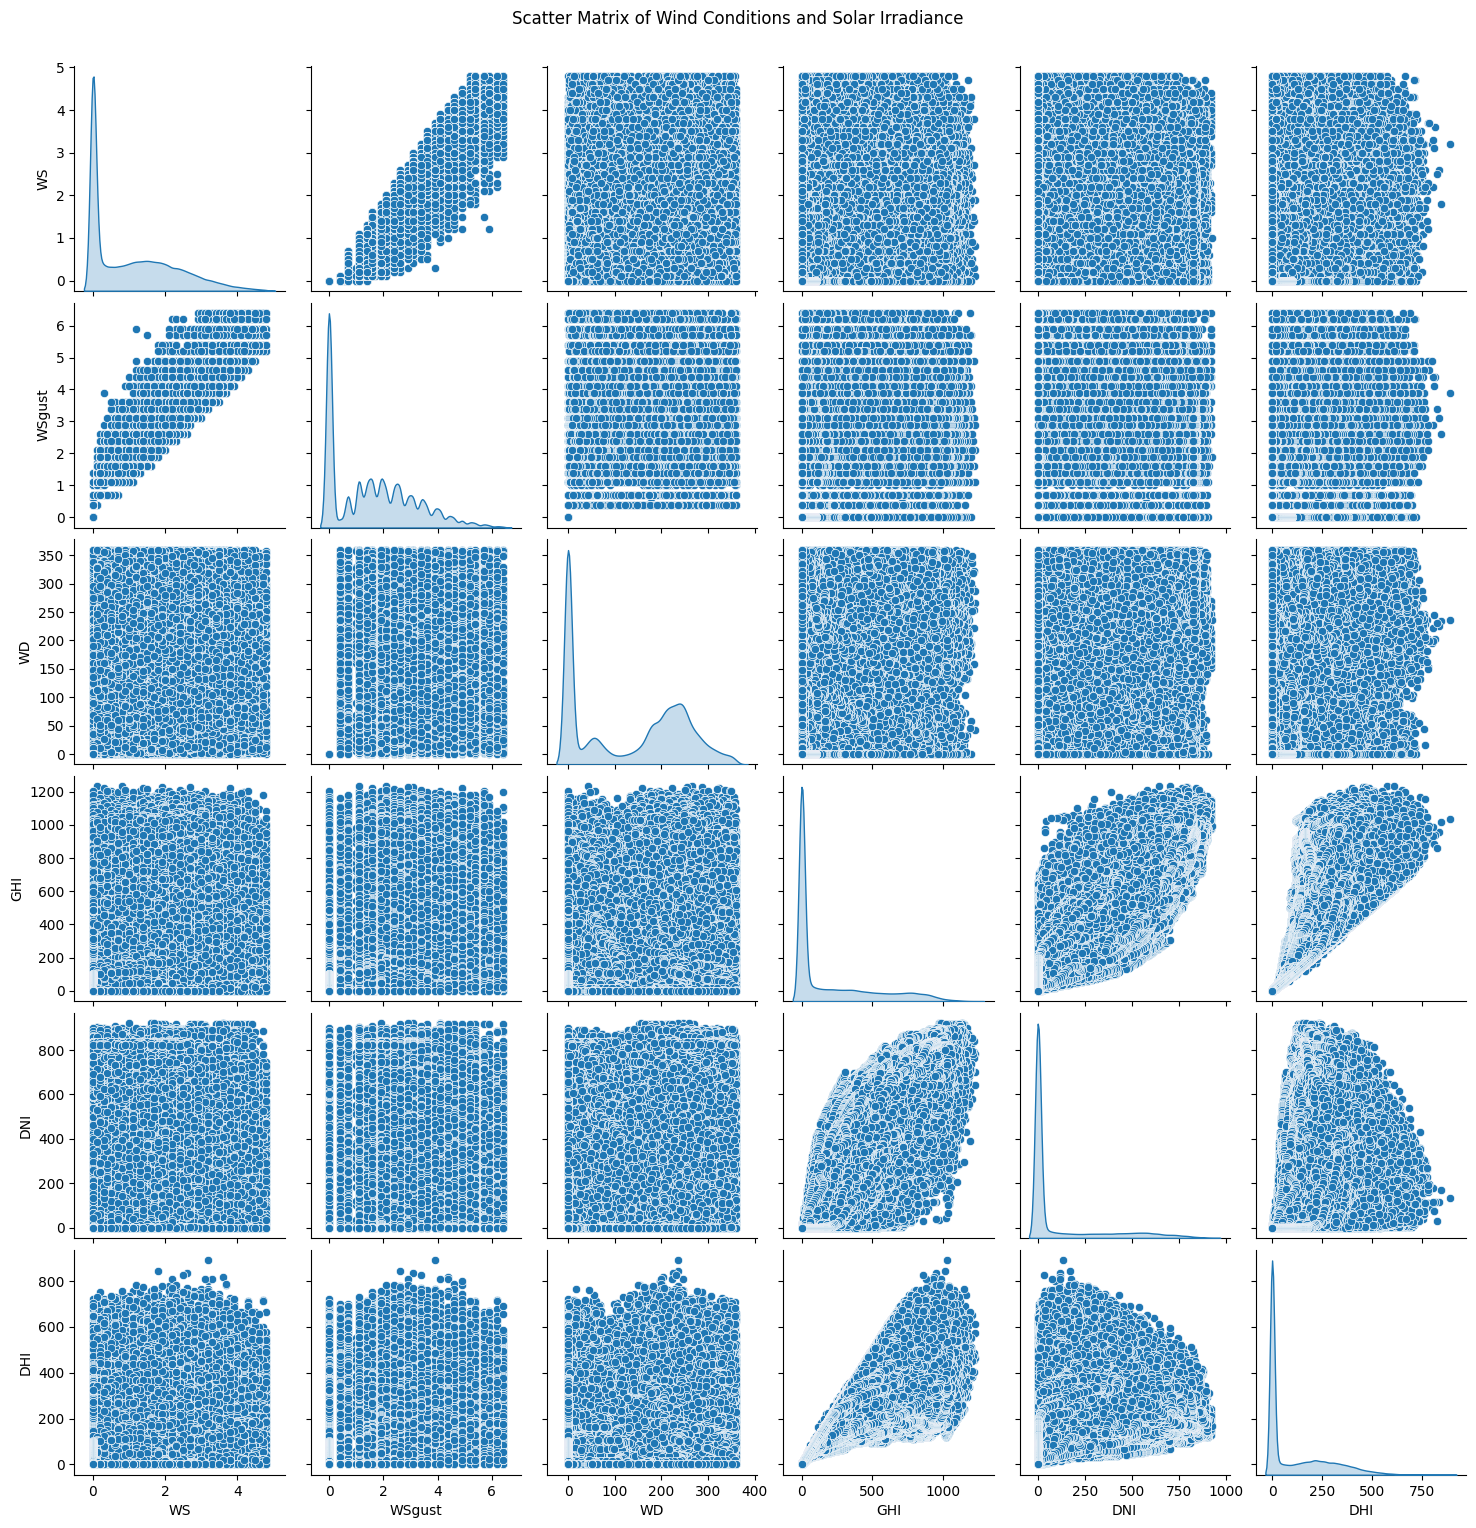

In [12]:
sns.pairplot(df[['WS', 'WSgust', 'WD', 'GHI', 'DNI', 'DHI']], diag_kind='kde')
plt.suptitle("Scatter Matrix of Wind Conditions and Solar Irradiance", y=1.02)
plt.show()

Creating polar plots for wind speed and direction

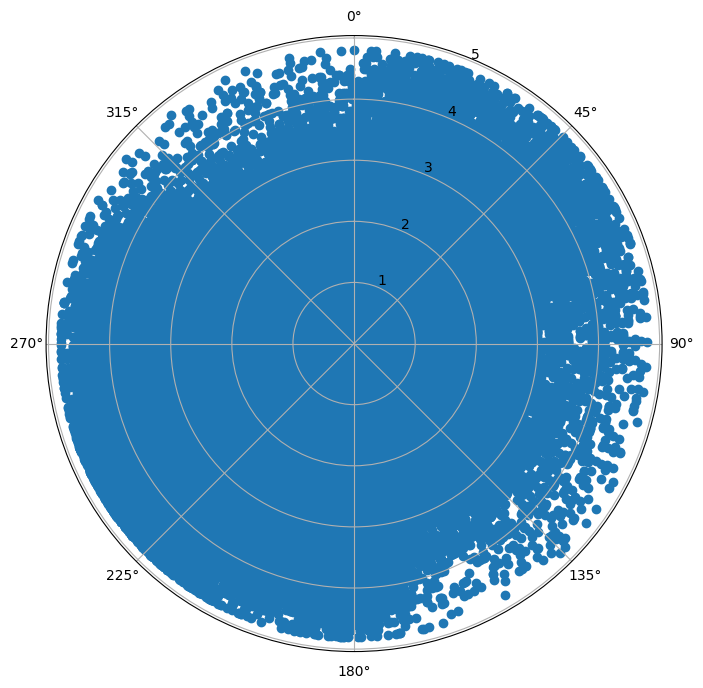

In [13]:
theta = np.deg2rad(df['WD'])
r = df['WS']

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection='polar')
ax.scatter(theta, r)
ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi / 2.0)
plt.show()

Temperature and Humidity Analysis:

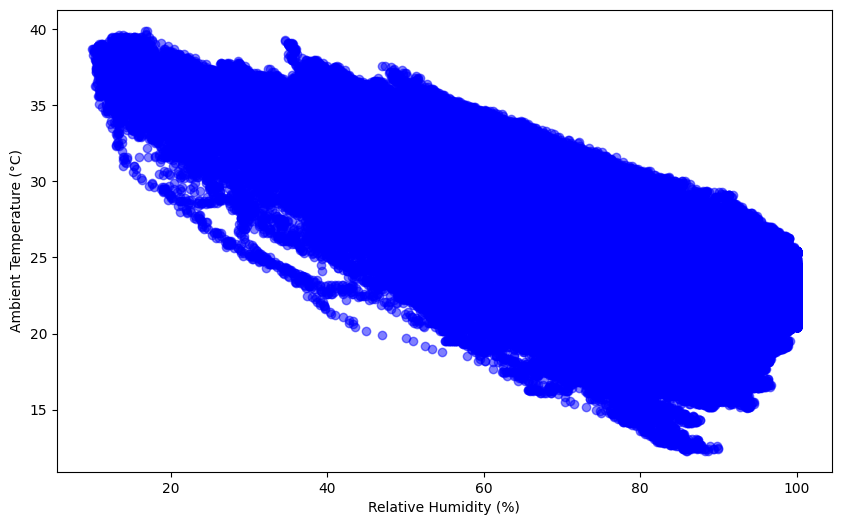

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(df['RH'], df['Tamb'], c='blue', alpha=0.5)
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Ambient Temperature (°C)')
plt.show()
